In [85]:
import yfinance as yf
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
import matplotlib as mpl

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

import warnings
warnings.filterwarnings('ignore')

In [40]:
dataset = pd.read_pickle("../data/all_tickers_features.pkl")

In [68]:
dataset.shape

(1963723, 27)

In [42]:
dataset.head(10)

,Ticker,Open,High,Low,Close,Adj Close,Volume,Currency,MACD,RSI,...,Return_1m,Return_2m,Return_3m,Forward_Return_1w,Forward_Return_1m,Forward_Return_2m,Forward_Return_3m,Year,Month,Weekday
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,BA,0.837449,0.837449,0.823045,0.823045,0.145748,352200.0,USD,NaN,NaN,...,NaN,NaN,NaN,0.005000,0.100000,0.015000,-0.102500,1962,1,1
1962-01-02,CAT,1.604167,1.619792,1.588542,1.604167,0.134703,163200.0,USD,NaN,NaN,...,NaN,NaN,NaN,0.064935,0.055195,0.061688,-0.081169,1962,1,1
1962-01-02,HPQ,0.131273,0.131273,0.124177,0.124177,0.006758,2480300.0,USD,NaN,NaN,...,NaN,NaN,NaN,-0.021429,-0.078571,-0.025000,-0.296429,1962,1,1
1962-01-02,GE,0.751202,0.763722,0.743690,0.748698,0.001776,2156500.0,USD,NaN,NaN,...,NaN,NaN,NaN,-0.036789,0.016722,0.041806,-0.061873,1962,1,1
1962-01-02,MO,0.000000,0.191840,0.189236,0.189236,0.000222,345600.0,USD,NaN,NaN,...,NaN,NaN,NaN,-0.032110,-0.059633,-0.170872,-0.219037,1962,1,1
1962-01-02,IP,0.000000,9.064277,8.852777,8.852777,0.752891,48600.0,USD,NaN,NaN,...,NaN,NaN,NaN,-0.047782,-0.010239,0.027304,-0.146758,1962,1,1
1962-01-02,IBM,7.713333,7.713333,7.626667,7.626667,0.602089,387200.0,USD,NaN,NaN,...,NaN,NaN,NaN,-0.015734,-0.041958,-0.056818,-0.208042,1962,1,1
1962-01-02,CVX,0.000000,3.296131,3.244048,3.296131,0.050512,105600.0,USD,NaN,NaN,...,NaN,NaN,NaN,-0.002257,0.063205,0.063205,0.051919,1962,1,1
1962-01-02,XOM,0.000000,1.589844,1.578125,1.578125,0.013385,902400.0,USD,NaN,NaN,...,NaN,NaN,NaN,-0.004950,0.066832,0.084158,0.056931,1962,1,1


In [71]:
ggal_2y = dataset.loc[(dataset.Year > 2018) & (dataset.Ticker == 'GGAL')]

In [79]:
ggal_2y.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09',
               '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15',
               '2020-10-16', '2020-10-19'],
              dtype='datetime64[ns]', name='Date', length=454, freq=None)

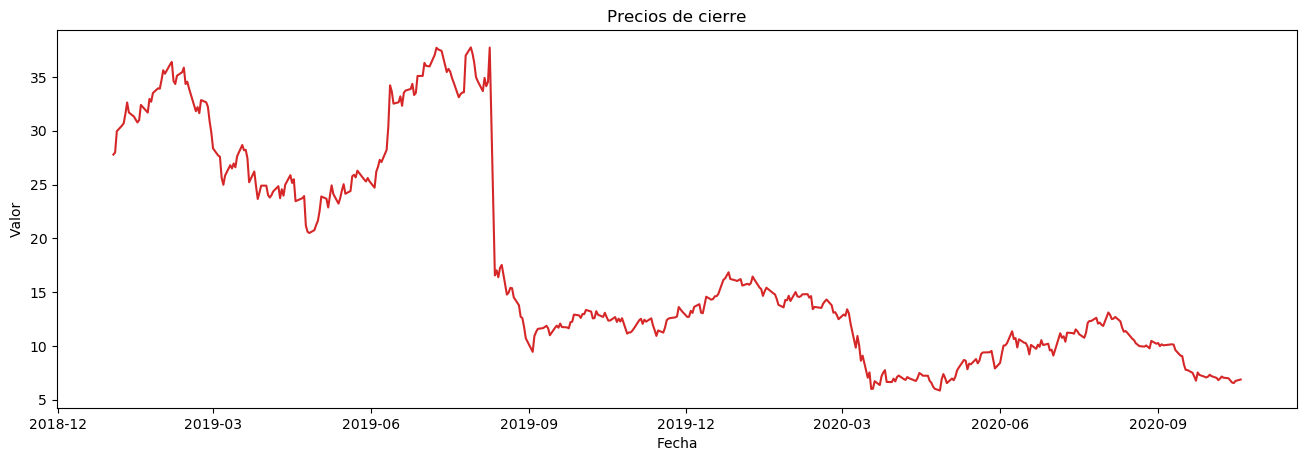

In [80]:
def plot_df(df, x, y, title="", xlabel='Fecha', ylabel='Valor', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(ggal_2y, x=ggal_2y.index, y=ggal_2y.loc[:,'Adj Close'], title='Precios de cierre')

In [164]:
ggal_5y = dataset.loc[(dataset.Year > 2015) & (dataset.Ticker == 'GGAL'),['Adj Close']]

In [165]:
# Preparamos los datos:
ggal_5y['year'] = [d.year for d in ggal_5y.index]
ggal_5y['month'] = [d.strftime('%b') for d in ggal_5y.index]
ggal_5y['day'] = [d.day for d in ggal_5y.index]
years = ggal_5y['year'].unique()

In [166]:
years

array([2016, 2017, 2018, 2019, 2020])

In [167]:
ggal_5y.loc[ggal_5y.year==2018, :]

,Adj Close,year,month,day
Date,,,,
2018-01-02,65.141380,2018,Jan,2
2018-01-03,64.860306,2018,Jan,3
2018-01-04,67.370598,2018,Jan,4
2018-01-05,66.633987,2018,Jan,5
2018-01-08,64.627701,2018,Jan,8
...,...,...,...,...
2018-12-24,23.979723,2018,Dec,24
2018-12-26,25.121613,2018,Dec,26
2018-12-27,25.707199,2018,Dec,27


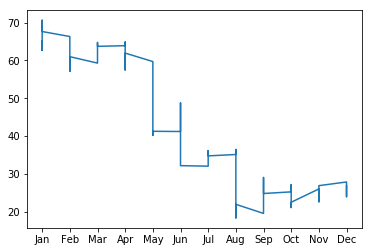

In [122]:
plt.plot('month', 'Adj Close', data=ggal_5y.loc[ggal_5y.year==2018, :])

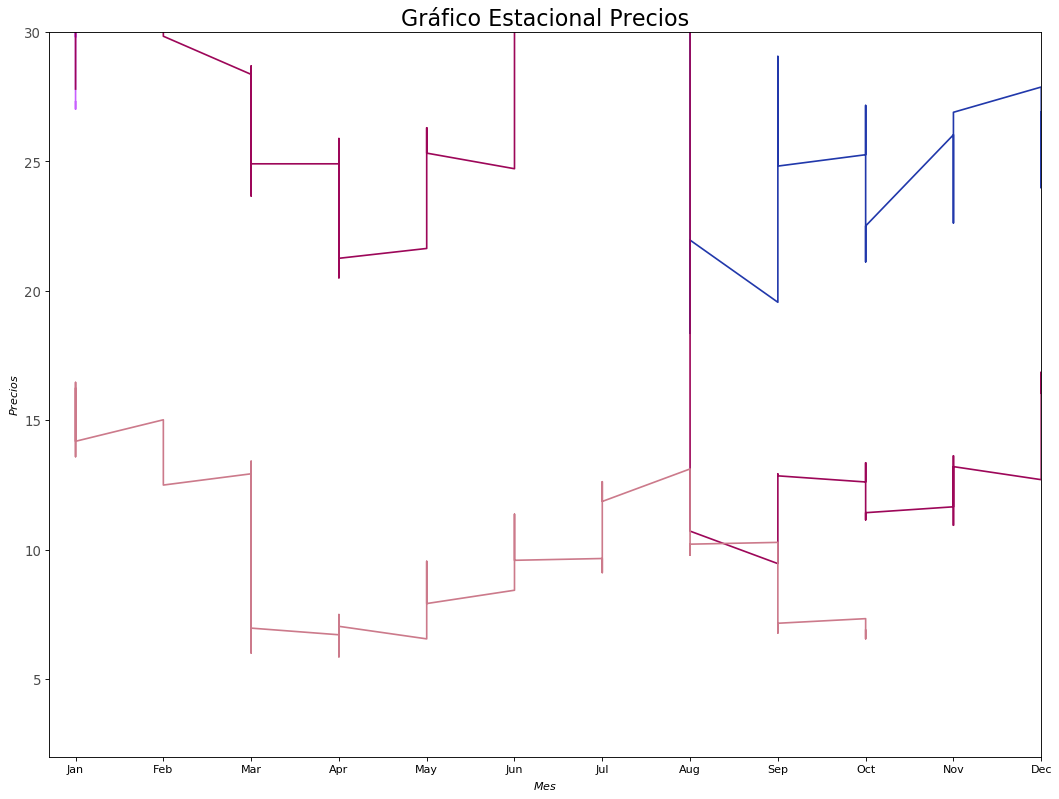

In [116]:
# Preparamos los colores:
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Ploteamos
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Adj Close', data=ggal_5y.loc[ggal_5y.year==y, :], color=mycolors[i], label=y) # grafica los 12 meses de cada año
        #plt.text(ggal_5y.loc[ggal_5y.year==y, :].shape[0]-.9, ggal_5y.loc[ggal_5y.year==y, 'Adj Close'][-1:].values[0], y, fontsize=12, color=mycolors[i])


plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Precios$', xlabel='$Mes$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Gráfico Estacional Precios", fontsize=20);